## Exploratory Data Analysis (EDA)

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the data
data = pd.read_csv(r'C:\Users\SamDutse\Documents\GitHub\Insurance\insurance.csv')


In [4]:
# Displaying basic info about the data
print(data.head())
print(data.info())
print(data.describe(include = "all"))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.00000

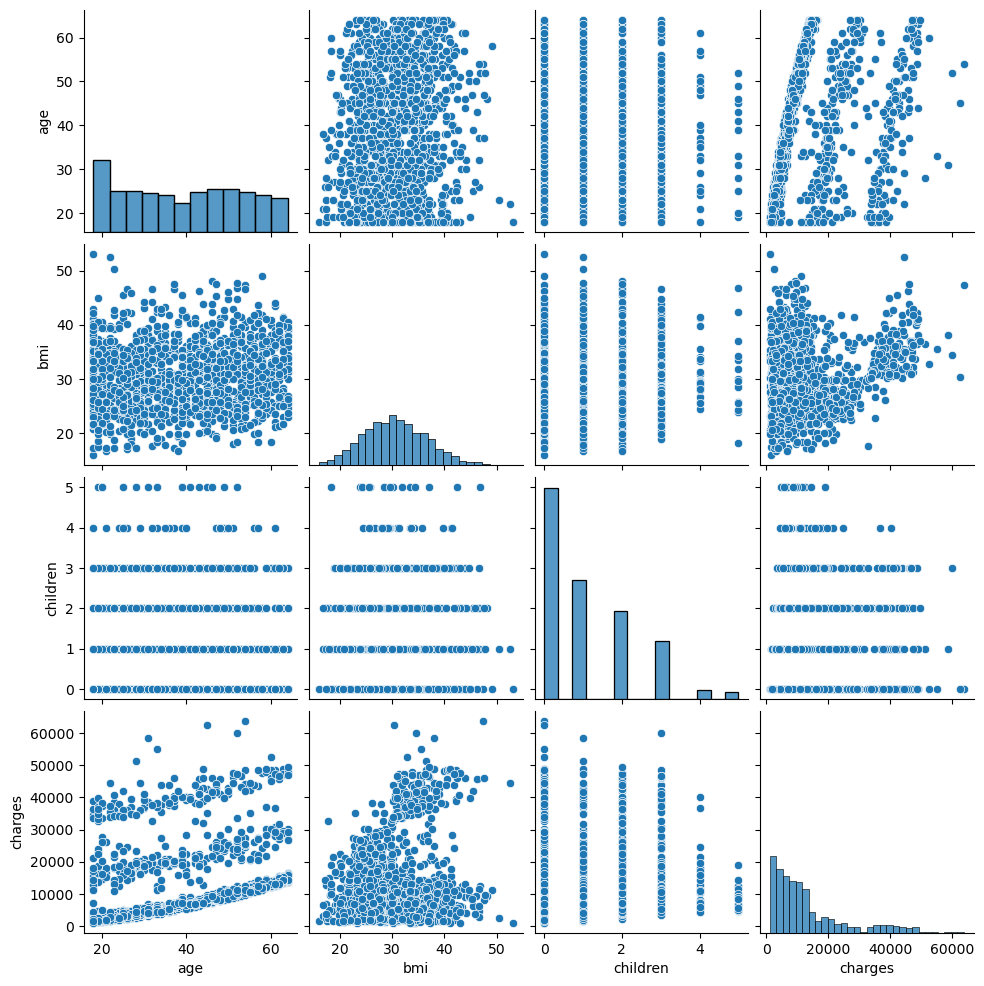

In [5]:
# Visualizing the data
# Pairplot to visualize relationships between numeric variables
sns.pairplot(data)
plt.show()

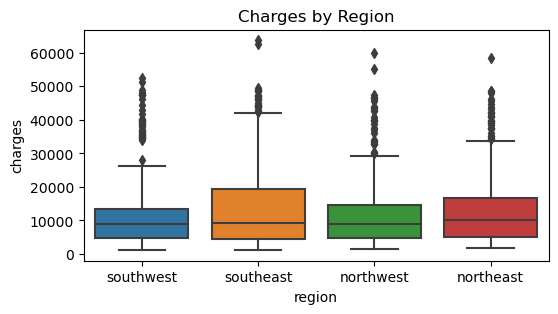

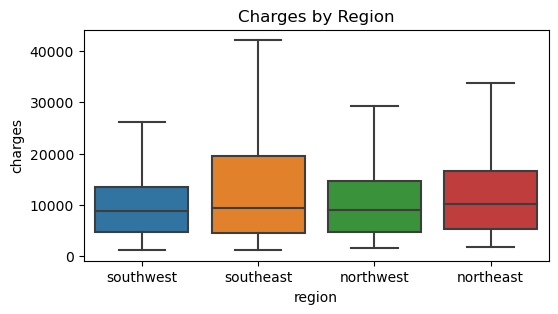

In [6]:
# Boxplot to visualize the distribution of charges based on categorical variables
plt.figure(figsize=(6, 3))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Charges by Region')
plt.show()


#Plot removing outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x='region', y='charges', data=data, showfliers = False)
plt.title('Charges by Region')
plt.show()

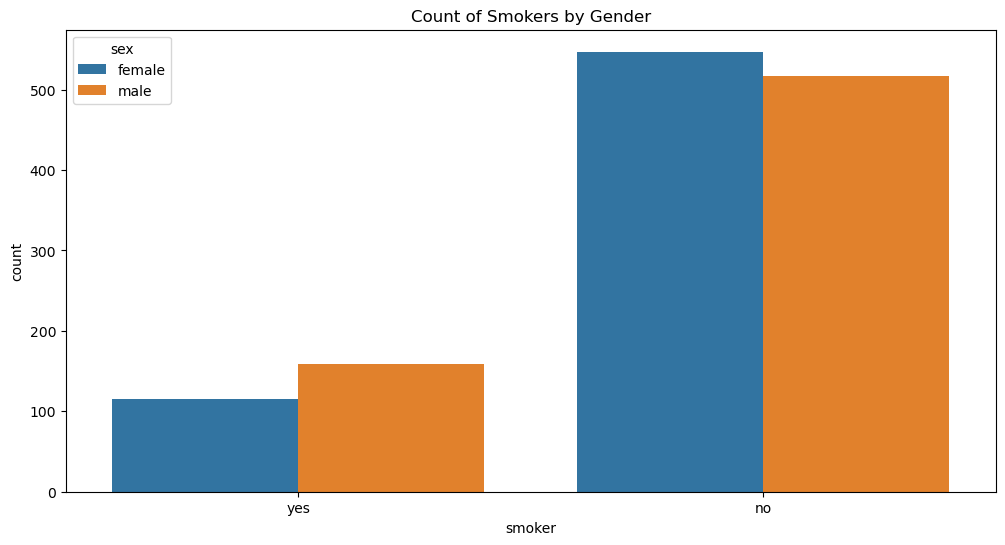

In [7]:
# Countplot to visualize the distribution of smokers and sexes
plt.figure(figsize=(12, 6))
sns.countplot(x='smoker', hue='sex', data=data)
plt.title('Count of Smokers by Gender')
plt.show()

## Data Preprocessing

In [8]:
# Converting categorical variables into numerical format
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'female' else 0)
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data['region'] = data['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

In [9]:
# Viewing to see the effect of the changes
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,1,16884.9240
1,18,0,33.77,1,0,0,1725.5523
2,28,0,33.00,3,0,0,4449.4620


## Splitting the Data

In [10]:
# Split the data into features (X) and target variable (y) or into independent and dependent variable
X = data.drop('charges', axis=1)
y = data['charges']

In [11]:
# Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building and Training the Regression Model

In [12]:
# Import and instantiate a regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [13]:
# Fit the model to the training data:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [15]:
# Predict charges on the test set:
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model's performance using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared):
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 4190.220190137917
Mean Squared Error: 33685623.35414443
R-squared: 0.783021587162344


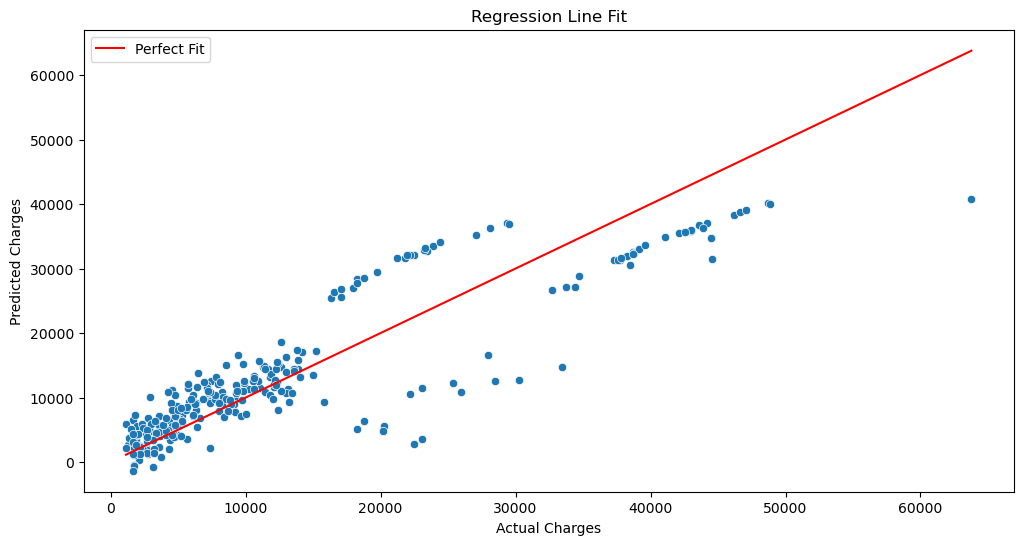

In [17]:
# Scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')  # Regression line
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Regression Line Fit')
plt.legend()
plt.show()